In [18]:
import numpy as np
import matplotlib.pyplot as plt


First, lets download dataset and understand the data
Each row on 'data' contains array representing images of the numbers 0-9 with 784 pixel values (or features of the images)
There are around 70K samples of images and labels each

In [3]:
# Downloading the dataset
try:
    from sklearn.datasets import fetch_openml
    mnist = fetch_openml('mnist_784', version=1, cache=True)
    mnist.target = mnist.target.astype(np.int8)
except ImportError:
    from sklearn.datasets import fetch_mldata
    mnist = fetch_mldata('MNIST original')
mnist["data"], mnist["target"]

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([5, 0, 4, ..., 4, 5, 6], dtype=int8))

Lets split data using sklearn libraries.. 
Data contains features and target labels separately..
we just use 5000 records and split them into training and test data with count 4000 and 1000

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(mnist["data"][:5000], mnist["target"][:5000], test_size=0.2)

Find all the 9s!
1. Find the 9s using K-Nearest neighbours for Minkowski metric of order (1, 2, 3).
We use sklearn K-Nearest Neighbors. 
From https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html 
we can see the default metric is Minkowski. The default parameter for power p is 2

Now, we need to modify the labels to do binary classification. 
We will keep True labels for digits 9 and False labels for any other digits

In [6]:
y__train = (y_train==9)
y__test = (y_test==9)

In [7]:
from sklearn.neighbors import KNeighborsClassifier

def knn():
    for i in range(1,4):
        KNN = KNeighborsClassifier(n_neighbors=i,p=i)
        KNN.fit(X_train, y__train)
        indices = KNN.predict(X_test)
        print(' neighbors {} order {} score {}'.format(i,i,KNN.score(X_test, y__test)))

In [8]:
knn()

 neighbors 1 order 1 score 0.985
 neighbors 2 order 2 score 0.987
 neighbors 3 order 3 score 0.989


2. Find the 9s using Decision tree.

In [11]:
from sklearn.tree import DecisionTreeClassifier

def dtc(depth=1, criterion="gini"):
    DTC_ = DecisionTreeClassifier(criterion=criterion, max_depth=depth, max_features=784)

    DTC_.fit(X_train, y__train)

    digits = DTC_.predict(X_test)
    print(' depth {} score {}'.format(depth,DTC_.score(X_test, y__test)))

In [12]:
for i in range(1,31):
    dtc(i)

 depth 1 score 0.908
 depth 2 score 0.907
 depth 3 score 0.923
 depth 4 score 0.93
 depth 5 score 0.945
 depth 6 score 0.941
 depth 7 score 0.945
 depth 8 score 0.947
 depth 9 score 0.945
 depth 10 score 0.949
 depth 11 score 0.951
 depth 12 score 0.944
 depth 13 score 0.94
 depth 14 score 0.938
 depth 15 score 0.946
 depth 16 score 0.95
 depth 17 score 0.944
 depth 18 score 0.938
 depth 19 score 0.935
 depth 20 score 0.938
 depth 21 score 0.941
 depth 22 score 0.939
 depth 23 score 0.935
 depth 24 score 0.944
 depth 25 score 0.938
 depth 26 score 0.928
 depth 27 score 0.945
 depth 28 score 0.942
 depth 29 score 0.942
 depth 30 score 0.938


3. Find the 9s using Random Forests.

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

def random_forest(n_trees,depth):
    clf = RandomForestClassifier(n_estimators=n_trees, criterion="gini", max_depth=depth, max_features="auto")
    clf = clf.fit(X_train[:1000], y__train[:1000])
    predictionRes = clf.predict(X_test)
    print('N_Trees {} depth {} score {}'.format(n_trees,depth,clf.score(X_test,y__test)))


In [14]:
for i in range(1,32):
    random_forest(i,i)

N_Trees 1 depth 1 score 0.908
N_Trees 2 depth 2 score 0.908
N_Trees 3 depth 3 score 0.912
N_Trees 4 depth 4 score 0.921
N_Trees 5 depth 5 score 0.929
N_Trees 6 depth 6 score 0.938
N_Trees 7 depth 7 score 0.947
N_Trees 8 depth 8 score 0.949
N_Trees 9 depth 9 score 0.952
N_Trees 10 depth 10 score 0.955
N_Trees 11 depth 11 score 0.958
N_Trees 12 depth 12 score 0.959
N_Trees 13 depth 13 score 0.961
N_Trees 14 depth 14 score 0.963
N_Trees 15 depth 15 score 0.961
N_Trees 16 depth 16 score 0.965
N_Trees 17 depth 17 score 0.96
N_Trees 18 depth 18 score 0.95
N_Trees 19 depth 19 score 0.969
N_Trees 20 depth 20 score 0.958
N_Trees 21 depth 21 score 0.952
N_Trees 22 depth 22 score 0.962
N_Trees 23 depth 23 score 0.97
N_Trees 24 depth 24 score 0.959
N_Trees 25 depth 25 score 0.966
N_Trees 26 depth 26 score 0.956
N_Trees 27 depth 27 score 0.966
N_Trees 28 depth 28 score 0.958
N_Trees 29 depth 29 score 0.966
N_Trees 30 depth 30 score 0.959
N_Trees 31 depth 31 score 0.963


Find every single digits!

1. First forget about the labels and run the k-means algorithm to find whether there is an underlying patterns. 
So, first find the k clusters (here is obviously 10 clusters). Then look at their labels and find the accuracy. 
By doing this you are turning a supervised learning into an unsupervised learning!

In [20]:
from sklearn.cluster import KMeans

In [21]:
def plot_d(digit, label):
    plt.axis('off')
    plt.imshow(digit.reshape((28,28)), cmap=plt.cm.gray)
    plt.title(label)

def plot_ds(digits, title, labels):
    n=digits.shape[0]
    n_rows=n/25+1
    n_cols=25
    plt.figure(figsize=(n_cols * 0.9, n_rows * 1.3))
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.suptitle(title)
    for i in range(n):
        plt.subplot(n_rows, n_cols, i + 1)
        plot_d(digits[i,:], "%d" % labels[i])
        
def clusters_stats(predict, y):
    stats = np.zeros((10,3))
    for i in range(10):
        indices = np.where(predict == i)
        cluster = y[indices]
        stats[i,:] = clust_stats(cluster)
    return stats

def plot_clusters(predict, y, stats):
    for i in range(10):
        indices = np.where(predict == i)
        title = "Most freq item %d, cluster size %d, majority %d " % (stats[i,2], stats[i,1], stats[i,0])
        plot_ds(X_train[indices][:25], title, y[indices])
                
def clust_stats(cluster):
    class_freq = np.zeros(10)
    for i in range(10):
        class_freq[i] = np.count_nonzero(cluster == i)
    most_freq = np.argmax(class_freq)
    n_majority = np.max(class_freq)
    n_all = np.sum(class_freq)
    return (n_majority, n_all, most_freq)

def clusters_purity(clusters_stats):
    majority_sum  = clusters_stats[:,0].sum()
    n = clusters_stats[:,1].sum()
    return majority_sum / n

Plotting an extract of the 10 clusters, overall purity: 0.572500


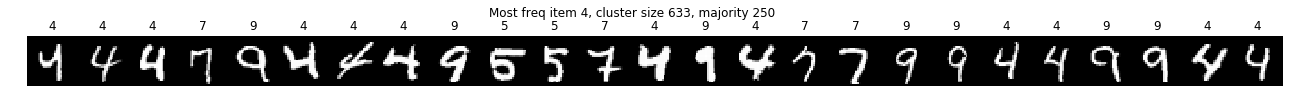

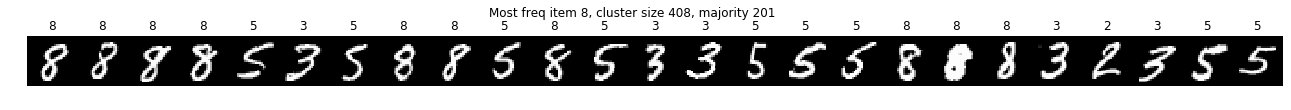

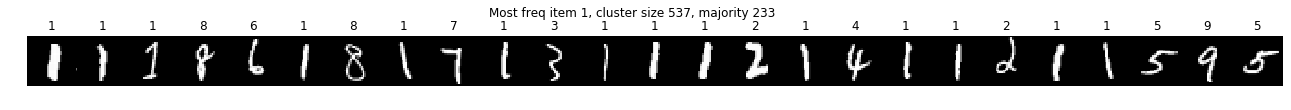

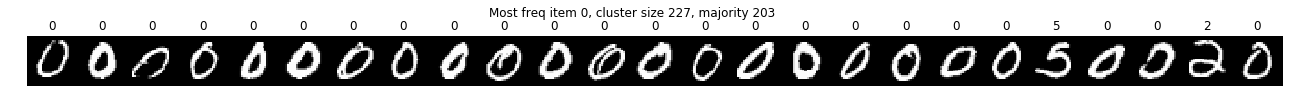

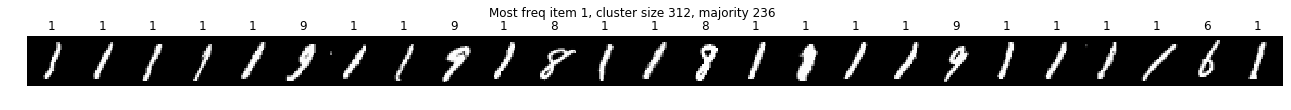

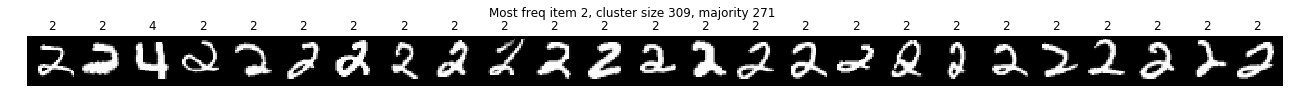

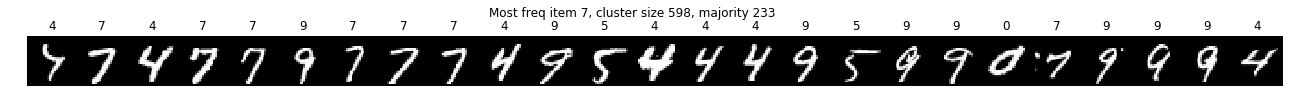

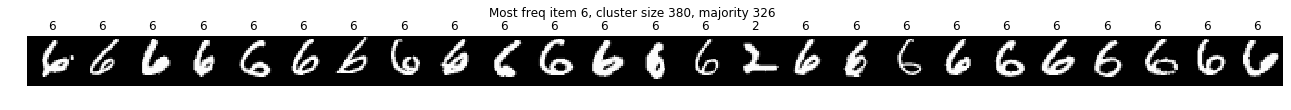

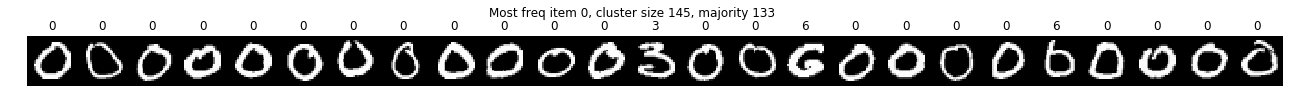

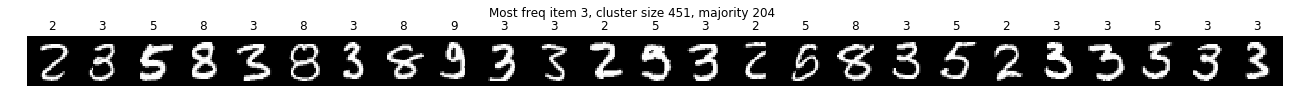

In [23]:
from sklearn.pipeline import Pipeline

n_digits=10
kmeans = KMeans(n_clusters=n_digits,n_init=1)
predictor = Pipeline([('kmeans', kmeans)])

predict = predictor.fit(X_train).predict(X_train)

stats = clusters_stats(predict, y_train)
purity = clusters_purity(stats)

print("Plotting an extract of the 10 clusters, overall purity: %f" % purity)

plot_clusters(predict, y_train, stats)

2. Find the digits using K-Nearest neighbours for Minkowski metric of order (1, 2, 3).

In [24]:
from sklearn.neighbors import KNeighborsClassifier

def knn():
    for i in range(1,4):
        KNN = KNeighborsClassifier(n_neighbors=i,p=i)
        KNN.fit(X_train, y_train)
        indices = KNN.predict(X_test)
        print(' neighbors {} order {} score {}'.format(i,i,KNN.score(X_test, y_test)))

In [25]:
knn()

 neighbors 1 order 1 score 0.941
 neighbors 2 order 2 score 0.932
 neighbors 3 order 3 score 0.947


3. Find the digits using Decision tree.

In [26]:
from sklearn.tree import DecisionTreeClassifier

def dtc(depth=1, criterion="gini"):
    DTC_ = DecisionTreeClassifier(criterion=criterion, max_depth=depth, max_features=784)

    DTC_.fit(X_train, y_train)

    digits = DTC_.predict(X_test)
    print(' depth {} score {}'.format(depth,DTC_.score(X_test, y_test)))

In [27]:
for i in range(1,31):
    dtc(i)

 depth 1 score 0.184
 depth 2 score 0.316
 depth 3 score 0.508
 depth 4 score 0.616
 depth 5 score 0.699
 depth 6 score 0.753
 depth 7 score 0.775
 depth 8 score 0.783
 depth 9 score 0.779
 depth 10 score 0.783
 depth 11 score 0.779
 depth 12 score 0.775
 depth 13 score 0.773
 depth 14 score 0.771
 depth 15 score 0.771
 depth 16 score 0.763
 depth 17 score 0.781
 depth 18 score 0.777
 depth 19 score 0.787
 depth 20 score 0.774
 depth 21 score 0.776
 depth 22 score 0.785
 depth 23 score 0.763
 depth 24 score 0.775
 depth 25 score 0.785
 depth 26 score 0.781
 depth 27 score 0.777
 depth 28 score 0.767
 depth 29 score 0.775
 depth 30 score 0.773


4. Find the digits using Random Forests.

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

def random_forest(n_trees,depth):
    clf = RandomForestClassifier(n_estimators=n_trees, criterion="gini", max_depth=depth, max_features="auto")
    clf = clf.fit(X_train[:1000], y_train[:1000])
    predictionRes = clf.predict(X_test)
    print('N_Trees {} depth {} score {}'.format(n_trees,depth,clf.score(X_test,y_test)))


In [29]:
for i in range(1,32):
    random_forest(i,i)

N_Trees 1 depth 1 score 0.186
N_Trees 2 depth 2 score 0.372
N_Trees 3 depth 3 score 0.534
N_Trees 4 depth 4 score 0.633
N_Trees 5 depth 5 score 0.757
N_Trees 6 depth 6 score 0.757
N_Trees 7 depth 7 score 0.777
N_Trees 8 depth 8 score 0.807
N_Trees 9 depth 9 score 0.819
N_Trees 10 depth 10 score 0.816
N_Trees 11 depth 11 score 0.801
N_Trees 12 depth 12 score 0.846
N_Trees 13 depth 13 score 0.824
N_Trees 14 depth 14 score 0.837
N_Trees 15 depth 15 score 0.842
N_Trees 16 depth 16 score 0.833
N_Trees 17 depth 17 score 0.859
N_Trees 18 depth 18 score 0.846
N_Trees 19 depth 19 score 0.853
N_Trees 20 depth 20 score 0.849
N_Trees 21 depth 21 score 0.861
N_Trees 22 depth 22 score 0.855
N_Trees 23 depth 23 score 0.867
N_Trees 24 depth 24 score 0.86
N_Trees 25 depth 25 score 0.885
N_Trees 26 depth 26 score 0.868
N_Trees 27 depth 27 score 0.867
N_Trees 28 depth 28 score 0.867
N_Trees 29 depth 29 score 0.876
N_Trees 30 depth 30 score 0.868
N_Trees 31 depth 31 score 0.878


5. Comment on any significant difference between your results for the binary classifier vs multi-class classifiers.

The accuracy is higher for binary classification instead of multi-class classifiers especially random forest. But, still both classifier have decent performance in classifying MINIST dataset. K-Means got low accuracy 0.586250 on muti-class labels, but- on binary class lables the accuracy was 89%